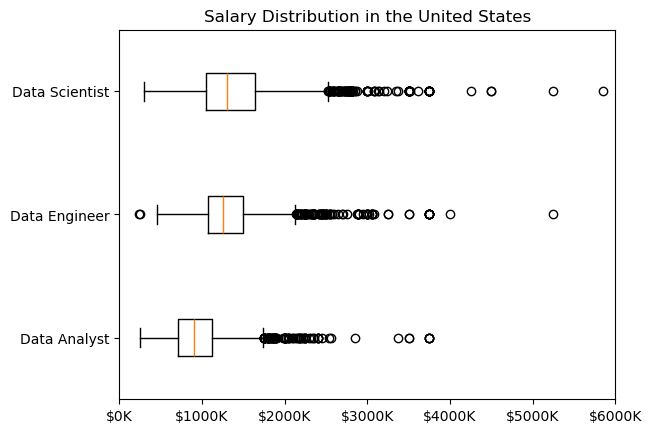

In [12]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../pandas/data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


def box_plot(x):
    if pd.notna(x):
        return ast.literal_eval(x)
    else:
        return x
df['job_skills'] = df['job_skills'].apply(box_plot)
# fig,ax = plt.subplots()
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_DA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')]

df_DA = df_DA.dropna(subset=['salary_year_avg'])
job_list = [df_DA[df_DA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in the United States')
ax=plt.gca()
plt.xlim(0,600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/100)}K'))

